# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Import dataset**

In [ ]:
df=pd.read_csv('/content/en_dup.csv')
df.drop(columns=['source','author','time'],inplace=True)

## Our dataset has three type of labels ,True,False and unverified but we need only true and false so we take only that from data
df=df[(df['label']=='F') | (df['label']=='T')]
df.head()

,label,content
0,F,Coronavirus was created in a government lab as...
1,F,The lie that coronavirus came from a bat or a ...
2,F,The health experts had predicted the virus cou...
3,F,A video clip supposedly showed that the expone...
4,T,Almost 200 people in Italy died from the coron...


# **Data preprocessing**

In [ ]:
### check each column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5559 entries, 0 to 7178
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5559 non-null   object
 1   content  5559 non-null   object
dtypes: object(2)
memory usage: 130.3+ KB


In [ ]:
#check dataset dimensions 
df.shape

(5559, 2)

# Check missing value in our dataset

In [ ]:
### Here we check the missing value of each column in our dataset 
miss_per=df.isnull().sum()/df.shape[0]*100
miss_per

label      0.0
content    0.0
dtype: float64

# **EDA(Exploratoray Data Analysis**

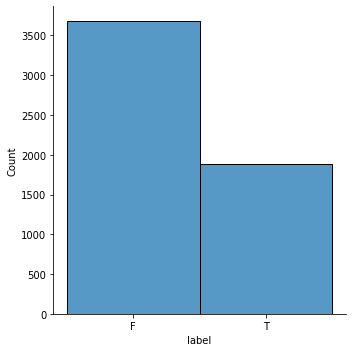

In [ ]:
## see the True and False counts
sns.displot(df['label'])

In [ ]:
df['label'].value_counts()

F    3681
T    1878
Name: label, dtype: int64

In our dataset, the Total false news about covid are 3681 and true news are 1878.

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

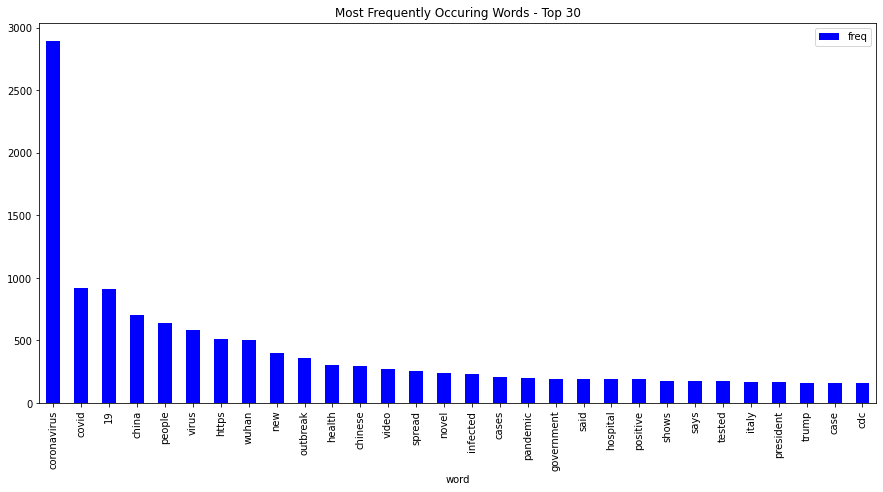

In [ ]:
## Getting most frequently used words in the Message 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['content'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

The most frequent word used is coronavirus. With the help of this graph we can decide also about the search Keywords. 

Text(0.5, 1.0, 'WordCloud - Vocabulary from News')

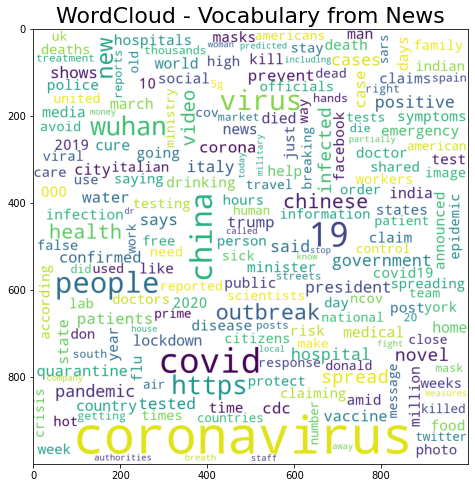

In [ ]:
## Getting the cloud of words
# represent the frequency or the importance of each word
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from News", fontsize = 22)

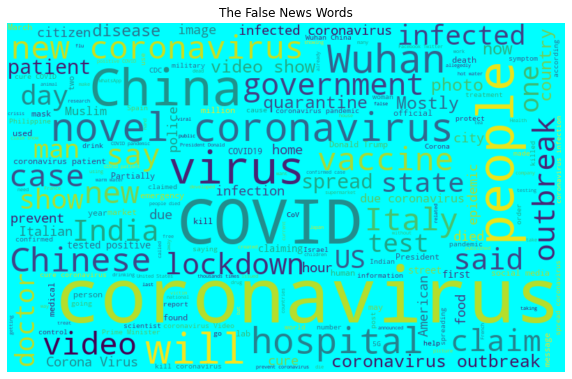

In [ ]:
## Getting the wordcloud of News words that was False news. 
False_words =' '.join([text for text in df['content'][df['label'] == 'F']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(False_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The False News Words')
plt.show()

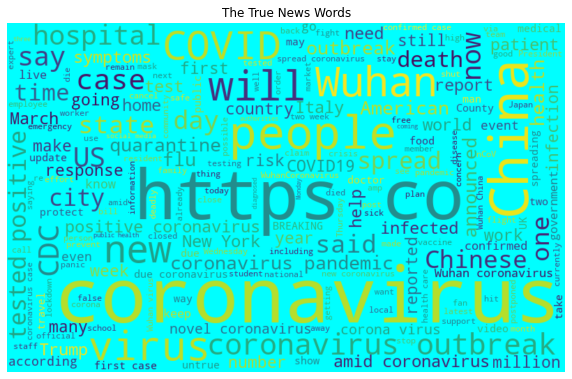

In [ ]:
## Getting the wordcloud of True news.
True_words =' '.join([text for text in df['content'][df['label'] == 'T']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(True_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The True News Words')
plt.show()

# Convert labels into 0 and 1 

Now we replace the "T" and "F" into 1 and 0 form as the machine learning algorithm work on numeric data.

In [ ]:
## Convert F as 0 and T as 1.
new_label = {"label": {"F":0, "T": 1}}
df.replace(new_label , inplace = True)

In [ ]:
df.head()

,label,content
0,0,Coronavirus was created in a government lab as...
1,0,The lie that coronavirus came from a bat or a ...
2,0,The health experts had predicted the virus cou...
3,0,A video clip supposedly showed that the expone...
4,1,Almost 200 people in Italy died from the coron...


# **Creating dependent And independent Variable for models**

In [ ]:
## Taking X the content column and y as the label column
X =df['content']
y =df['label']

# **Spliting the dataset into training and testing**

In [ ]:
### import command for splitting the dataset
from sklearn.model_selection import train_test_split

### split data: 80% for the training our model and 20%  for testing our model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# **Bagging of words**

In [ ]:
CountVectorizer= TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train=CountVectorizer.fit_transform(x_train)
x_test=CountVectorizer.transform(x_test)

# **Support Vector Machine (SVM)**

# Model training

In [ ]:
from sklearn.svm import SVC
SVC=SVC()
SVC.fit(x_train,y_train)

SVC()

# Model Prediction

In [ ]:
## getting prediction from model giving testing data
pred_svc=SVC.predict(x_test)

# Model testing/evaluation

In [ ]:
print(classification_report(y_test,pred_svc))
print(accuracy_score(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       744
           1       0.85      0.57      0.68       368

    accuracy                           0.82      1112
   macro avg       0.83      0.76      0.78      1112
weighted avg       0.83      0.82      0.81      1112

0.8246402877697842


Model is giving 82% accuracy.

# Confusion Matrix

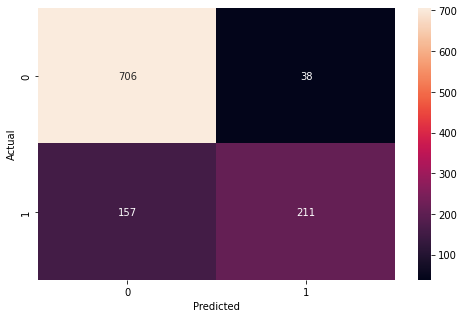

In [ ]:
cm = confusion_matrix(y_test,pred_svc)
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap( cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Naïve Bayes (NB)**

# Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train.toarray(),y_train)

GaussianNB()

# Model Prediction

In [ ]:
## getting prediction from model giving testing data
pred_NB=NB.predict(x_test.toarray())

# Model testing/evaluation

In [ ]:
print(classification_report(y_test,pred_NB))
print(accuracy_score(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       744
           1       0.64      0.54      0.58       368

    accuracy                           0.75      1112
   macro avg       0.71      0.69      0.70      1112
weighted avg       0.74      0.75      0.74      1112

0.7464028776978417


Model has 74.6% accuracy.

# Confusion Matrix

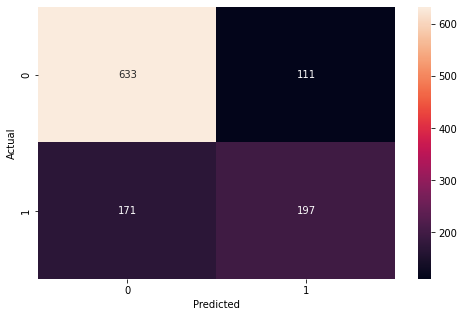

In [ ]:
cm = confusion_matrix(y_test,pred_NB)
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap( cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Random Forest (RF)**

# Model training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

## Model prediction

In [ ]:
## getting prediction from model giving testing data
pred_RF=RF.predict(x_test)

# Model testing/evaluation

In [ ]:
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       744
           1       0.89      0.55      0.68       368

    accuracy                           0.83      1112
   macro avg       0.85      0.76      0.78      1112
weighted avg       0.84      0.83      0.82      1112

0.8282374100719424


Model has 83.6% accuracy.

# Confusion Matrix

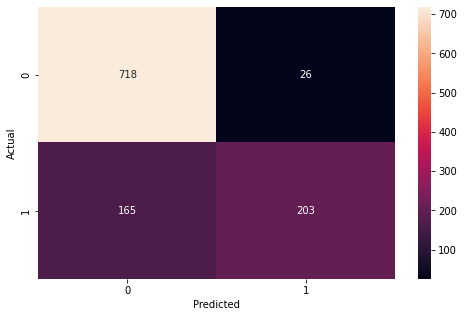

In [ ]:
cm = confusion_matrix(y_test,pred_RF)
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap( cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Model Comparison**

We applied three models: 
1.  Support Vector Machine (SVM)
2.  Naive Bayes
3.  Random Forest

From these three, the Random Forest is giving the best accuracy.





# **Tweet Prediction system**

In [ ]:
X[0]

'Coronavirus was created in a government lab as a bioweapon and then released on the people of China'

In [ ]:
#Taking input from user
Tweet = [input("Paste the text of the tweet here :      ")]
final_data=CountVectorizer.transform(Tweet)

predictions=RF.predict(final_data)
print('*************************************')
if (predictions[0]==0):
  print("The News is False")
else:
  print("The News Is true")

Paste the text of the tweet here :      Coronavirus was created in a government lab as a bioweapon and then released on the people of China
*************************************
The News is False


Testing on new data: Here we give a tweet to the system and check the result. Our model is trained to predict if a Tweet is likely to contain true/false news.